In [95]:
from tqdm import tqdm
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
FILENAME_1 = 'english_dict1.txt'
FILENAME_2 = '/home/dasha/work/jungle/google-10000-english/20k.txt'
FILENAME_3 = '/home/dasha/work/personal/utils/english3.txt'
FILENAME_4 = '/home/dasha/work/personal/utils/words_alpha.txt'

In [97]:
with open(FILENAME_3, 'r', encoding='utf-8') as f:
    lines = f.readlines()
lines = [line.replace('\n', '') for line in lines]

In [98]:
lines[:50]

['a',
 'aa',
 'aaa',
 'aachen',
 'aardvark',
 'aardvarks',
 'aardwolf',
 'aardwolves',
 'aarhus',
 'aaron',
 'aaronic',
 'aaronical',
 'aasvogel',
 'aasvogels',
 'ab',
 'aba',
 'ababa',
 'abac',
 'abaca',
 'abacas',
 'abaci',
 'aback',
 'abacs',
 'abactinal',
 'abactinally',
 'abactor',
 'abactors',
 'abacus',
 'abacuses',
 'abadan',
 'abaddon',
 'abaft',
 'abalone',
 'abalones',
 'abampere',
 'abamperes',
 'aband',
 'abandon',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandonees',
 'abandoning',
 'abandonment',
 'abandonments',
 'abandons',
 'abas',
 'abase',
 'abased',
 'abasement']

In [99]:
def build_charngram(word, n):
    return [word[i:i+n] for i in range(len(word)-n+1)]

def build_freqs(sample):
    chars = {}
    ndict = 0
        
    for word in tqdm(sample):
        charngrams = build_charngram(word, 2)
        ndict += len(charngrams)
        for ch in charngrams:
            if ch not in chars:
                chars[ch] = 0
            chars[ch] += 1                
    
    for ch in chars:
        chars[ch] /= ndict
        
    return chars

In [100]:
freqs = build_freqs(lines)

100%|██████████| 194433/194433 [00:00<00:00, 325133.58it/s]


In [101]:
import json
with open("en_frequencies_char2grams.json", "w", encoding='utf-8') as f:
    json.dump(freqs, f)

In [114]:
def count_metric(word, freqs, charn):
    if len(word)< charn:
        return -10
    chgm = build_charngram(word, charn)
    parts = [magic(freqs[ch]) if ch in freqs else 0.0001 for ch in chgm]
    return np.mean(parts)
    #return sum(parts)/len(parts)


def magic(n):
    return math.log(n)
    #return 1000*n

In [103]:
print(count_metric('yyu', freqs, 2))
print(count_metric('celt', freqs, 2))
print(count_metric('nen', freqs, 2))
print(count_metric('smart', freqs, 2))
print(count_metric('you', freqs, 2))

-11.19485356937533
-5.767660962809352
-4.5639257282184795
-5.42514850038196
-6.502113257488489


In [115]:
for s in 'gjxtve e vtyz yt gjlrk.xftncz nfhba smart'.split():
    print(count_metric(s, freqs, 2))

-7.30852694751901
-10
-5.2980676692144435
-7.540351022779898
-7.9692894139434145
-8.371813814263678
-5.42514850038196


In [104]:
metrics = [count_metric(word, freqs, 2) for word in lines]
print('median: {0}'.format(np.median(metrics)))
print('mean: {0}'.format(np.mean(metrics)))

median: -5.325488856089682
mean: -5.404016341787798


In [105]:
threshold = np.percentile(metrics, 80)
threshold

-4.993361861340855

(array([7.00000e+00, 8.00000e+00, 2.30000e+01, 6.10000e+01, 4.20000e+02,
        1.02020e+04, 1.48386e+05, 3.53000e+04, 0.00000e+00, 2.60000e+01]),
 array([-14.23367469, -12.91030722, -11.58693975, -10.26357228,
         -8.94020481,  -7.61683735,  -6.29346988,  -4.97010241,
         -3.64673494,  -2.32336747,  -1.        ]),
 <a list of 10 Patch objects>)

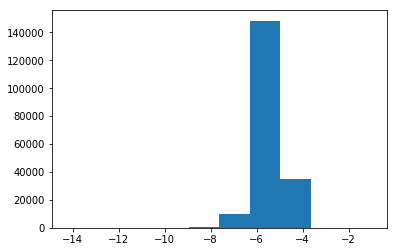

In [106]:
plt.hist(metrics)

In [107]:
with open('rus_switched.txt', 'r',  encoding='utf-8') as f:
    russ = f.readlines()
ruslines = [x.replace('\n', '') for x in russ]

In [108]:
metrics_rus = [count_metric(word, freqs, 2) for word in ruslines]
print('median: {0}'.format(np.median(metrics_rus)))
print('mean: {0}'.format(np.mean(metrics_rus)))

median: -7.69738259563874
mean: -7.419255386037624


([array([  128.,   929.,  7126., 23774., 29272., 20411., 11665.,  3325.,
          1216.,  2150.]),
  array([7.00000e+00, 1.30000e+01, 2.70000e+01, 9.60000e+01, 1.31800e+03,
         4.43290e+04, 1.48496e+05, 1.21000e+02, 0.00000e+00, 2.60000e+01])],
 array([-1.42336747e+01, -1.28102972e+01, -1.13869198e+01, -9.96354228e+00,
        -8.54016481e+00, -7.11678735e+00, -5.69340988e+00, -4.27003241e+00,
        -2.84665494e+00, -1.42327747e+00,  1.00000000e-04]),
 <a list of 2 Lists of Patches objects>)

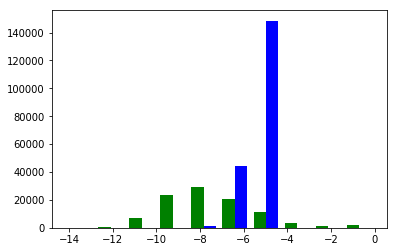

In [109]:
plt.hist([metrics_rus, metrics], color=['g','b'])

In [110]:
np.max(metrics_rus)

0.00010000000000000002

In [111]:
np.percentile(metrics_rus, 95)

-3.7141440792305107